#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Reading and Preprocessing Dataset

####Reading Dataset

In [3]:
df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [9]:
df.isnull().any()

Age            False
Sex            False
BP             False
Cholesterol    False
Na_to_K        False
Drug           False
dtype: bool

####Preprocessing Dataset

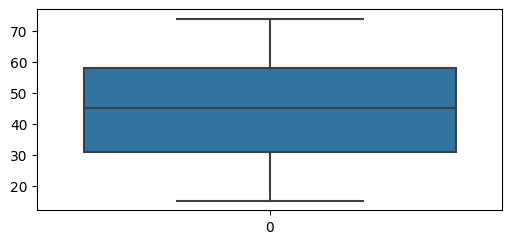

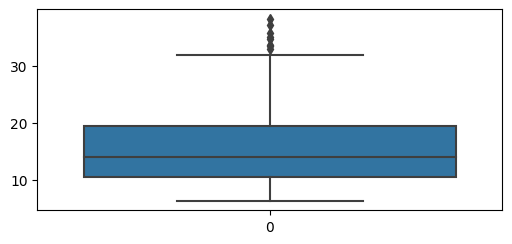

In [10]:
names=['Age','Na_to_K']
for i,j in enumerate(names):
  plt.figure(figsize=(6,12))
  plt.subplot(4,1,i+1)
  sns.boxplot(df[j])

In [41]:
x=df.iloc[:,0:5]
x.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [37]:
y = pd.get_dummies(df.iloc[:,5:]).values
y[0:5]

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [42]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=12)

In [43]:
le=LabelEncoder()

In [44]:
xtrain['Sex']=le.fit_transform(xtrain['Sex'])
xtest['Sex']=le.transform(xtest['Sex'])
xtrain['BP']=le.fit_transform(xtrain['BP'])
xtest['BP']=le.transform(xtest['BP'])
xtrain['Cholesterol']=le.fit_transform(xtrain['Cholesterol'])
xtest['Cholesterol']=le.transform(xtest['Cholesterol'])

In [20]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
77,26,0,0,1,19.161
47,68,1,1,0,10.291
94,56,1,1,0,15.015
14,50,0,2,0,12.703
41,58,0,0,1,14.239


In [21]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
23,48,0,1,0,15.036
182,20,0,1,1,11.686
172,39,0,2,1,17.225
21,63,1,2,0,25.917
63,45,1,1,1,8.370


#Building ANN Model

In [45]:
model=Sequential()
model.add(Dense(5,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(26,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [46]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
model.fit(xtrain,ytrain,batch_size=4,epochs=100,validation_data=(xtest,ytest))

Epoch 1/100
40/40 [==============================] - 0s 4ms/step - loss: 0.5652 - accuracy: 0.7625 - val_loss: 0.5778 - val_accuracy: 0.7750
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.8000 - val_loss: 0.5457 - val_accuracy: 0.7750
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4714 - accuracy: 0.7937 - val_loss: 0.5205 - val_accuracy: 0.8000
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4848 - accuracy: 0.8125 - val_loss: 0.5786 - val_accuracy: 0.7750
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 0.4610 - accuracy: 0.8250 - val_loss: 0.5131 - val_accuracy: 0.8000
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4874 - accuracy: 0.8062 - val_loss: 0.5320 - val_accuracy: 0.8500
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.4510 - accuracy: 0.8000 - val_loss: 0.4921 - val_accuracy: 0.8250
Epoch 8/100
4

#Testing Model with Random Data

In [60]:
pred=model.predict([[34,1,2,1,15.015]])

1/1 [==============================] - 0s 52ms/step


In [62]:
pred

array([[1.3259847e-02, 2.5316969e-09, 5.5335221e-09, 3.4681259e-04,
        9.8639327e-01]], dtype=float32)

In [61]:
pred
prob=np.array(pred[0])
max=prob.argmax()
if(max==0):
 print('DrugY')
elif(max==1):
  print('drugA')
elif(max==2):
  print('drugB')
elif(max==3):
  print('drugC')
elif(max==4):
  print('drugX')


drugX
